<a href="https://colab.research.google.com/github/saad1ibn2akhter/First_numpy_project/blob/main/model_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')


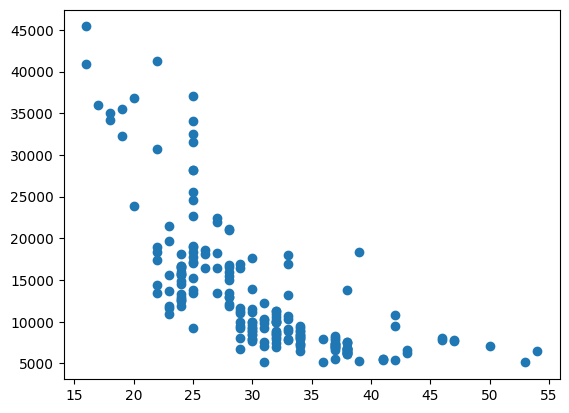

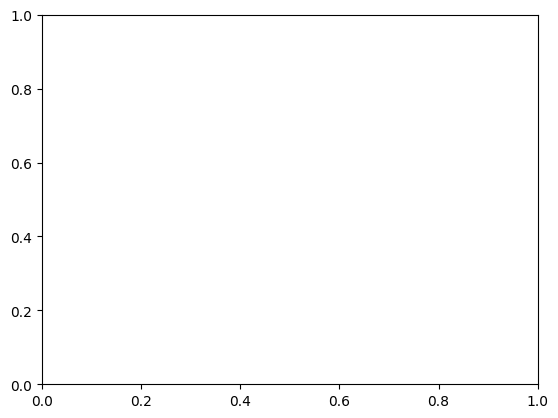

pipe prediction : [13495. 16500. 16500. 13950. 17450. 15250. 17710. 18920. 23875. 16430.
 16925. 20970. 21105. 24565. 30760. 41315. 36880.  5151.  6295.  6575.
  5572.  6377.  7957.  6229.  6692.  7609.  8558.  8921. 12964.  6479.
  6855.  5399.  6529.  7129.  7295.  7295.  7895.  9095.  8845. 10295.
 12945. 10345.  6785. 11048. 32250. 35550. 36000.  5195.  6095.  6795.
  6695.  7395. 10945. 11845. 13645. 15645.  8845.  8495. 10595. 10245.
 10795. 11245. 18280. 18344. 25552. 28248. 28176. 31600. 34184. 35056.
 40960. 45400. 16503.  5389.  6189.  6669.  7689.  9959.  8499. 12629.
 14869. 14489.  6989.  8189.  9279.  9279.  5499.  7099.  6649.  6849.
  7349.  7299.  7799.  7499.  7999.  8249.  8949.  9549. 13499. 14399.
 13499. 17199. 19699. 18399. 11900. 13200. 12440. 13860. 15580. 16900.
 16695. 17075. 16630. 17950. 18150.  5572.  7957.  6229.  6692.  7609.
  8921. 12764. 22018. 32528. 34028. 37028.  9295.  9895. 11850. 12170.
 15040. 15510. 18150. 18620.  5118.  7053.  7603.  7126.  7

/tmp/ipython-input-1242002711.py:58: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(X,hist=False,color="r",label='Actual value ')
/tmp/ipython-input-1242002711.py:59: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pipe.predict(X),hist=False, color="b",label="Predicted value

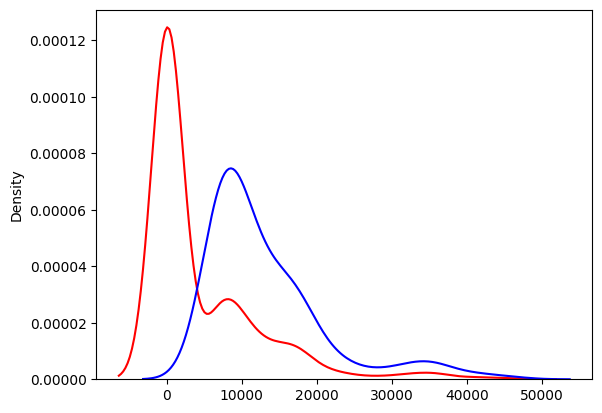

R^2 :  1.0


In [44]:
from multiprocessing import Pipe
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

file_path  ='used_cars_dataset.csv'
df = pd.read_csv(file_path)



lm = LinearRegression()
X = df[['price','horsepower', 'normalized-losses']]
Y = df['price']
lm.fit(X,Y)
yhat = lm.predict(X)

# print(yhat)
intercept = lm.intercept_
coefficient = lm.coef_

print(df.columns)

x= df['highway-mpg']
y= df['price']

plt.scatter(x,y)
plt.show()
# sns.regplot(x=x,y=y)


# sns.residplot(x=df['highway-mpg']  ,y =df['price'])

# ax1 = sns.distplot(X,hist=False,color="r",label='Actual value ')
# sns.distplot(yhat,hist=False, color="b",label="Predicted value" , ax=ax1)

plt.ylim(0,)
plt.show()

#POLYNOMIAL REGRESSION + PIPELINES
Input = [
    ('polynomial', PolynomialFeatures(degree=2)),
    ('scale', StandardScaler()),
    ('model', LinearRegression())
]

pipe = Pipeline(Input)

pipe.fit(X,Y)
print("pipe prediction :",pipe.predict(X))

ax1 = sns.distplot(X,hist=False,color="r",label='Actual value ')
sns.distplot(pipe.predict(X),hist=False, color="b",label="Predicted value" , ax=ax1)
plt.ylim(0,)
plt.show()

# print("MSE : ", mean_squared_error(df['price'] , Y_predict_simple_fit))
r_squared = lm.score(X,Y)
print("R^2 : ",r_squared)


